In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
sns.set_theme(style = "whitegrid")

import warnings

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("financial_data.csv")

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [8]:
df.dtypes

Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
df = df.drop('Id', axis=1) if len(df['Id']) == len(df) else df

In [7]:
import pandas as pd
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df, title="Loan Risk Prediction Dataset Report", explorative=True)

# Save the report as an HTML file
profile.to_file("financial_data_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
 df.groupby('Profession').Risk_Flag.mean().sort_values(ascending=False)

Profession
Police_officer                0.164052
Chartered_Accountant          0.153572
Army_officer                  0.152113
Surveyor                      0.151464
Software_Developer            0.148427
Scientist                     0.144321
Geologist                     0.144264
Civil_engineer                0.135832
Official                      0.135796
Firefighter                   0.135789
Air_traffic_controller        0.135391
Hotel_Manager                 0.135380
Aviator                       0.134931
Technical_writer              0.134167
Architect                     0.131200
Secretary                     0.130409
Lawyer                        0.129514
Computer_hardware_engineer    0.128444
Technician                    0.128289
Biomedical_Engineer           0.127560
Consultant                    0.125208
Microbiologist                0.124360
Computer_operator             0.124048
Flight_attendant              0.123635
Artist                        0.122609
Psychologist  

In [10]:
with pd.option_context('display.max_rows', None):
  display(df.groupby('CITY').Risk_Flag.mean().sort_values(ascending=False))



CITY
Bhubaneswar                     0.326194
Gwalior                         0.272727
Bettiah[33]                     0.266958
Kochi                           0.252862
Raiganj                         0.239554
Purnia[26]                      0.238866
Barasat                         0.238702
Sikar                           0.238452
Buxar[37]                       0.231472
Satna                           0.225681
Kottayam                        0.225369
Kavali                          0.225061
Mysore[7][8][9]                 0.220568
Bardhaman                       0.219158
Gandhidham                      0.216467
Imphal                          0.215548
Ghaziabad                       0.208733
Ramagundam[27]                  0.208447
Muzaffarnagar                   0.208084
Ahmedabad                       0.204931
Munger                          0.204651
Mathura                         0.203343
Thiruvananthapuram              0.203333
Hazaribagh                      0.202091
Guntur[13] 

In [11]:
df.groupby('STATE').Risk_Flag.mean().sort_values(ascending=False)

STATE
Manipur              0.215548
Tripura              0.168109
Kerala               0.167097
Jammu_and_Kashmir    0.158989
Madhya_Pradesh       0.154369
Odisha               0.142550
Rajasthan            0.140833
Jharkhand            0.133296
Chhattisgarh         0.133281
Himachal_Pradesh     0.133253
Assam                0.131691
Bihar                0.130586
Uttar_Pradesh[5]     0.130552
Telangana            0.130117
West_Bengal          0.128135
Haryana              0.124208
Gujarat              0.117724
Uttar_Pradesh        0.117711
Puducherry           0.116539
Andhra_Pradesh       0.116022
Maharashtra          0.113254
Mizoram              0.110718
Delhi                0.104554
Tamil_Nadu           0.103163
Karnataka            0.100295
Chandigarh           0.092988
Punjab               0.090042
Uttarakhand          0.070971
Sikkim               0.046053
Name: Risk_Flag, dtype: float64

In [13]:
def data_distribution(train, test):    
    plt.hist([train, test])
    plt.legend(['Train', 'Test'])
    plt.xticks(ticks=[0,1], labels=['No Default', 'Default'])
    plt.ylabel('Count')
    plt.title("Distribution of Train and Test Sets")
    plt.show()

In [15]:
def print_evaluation(y_test, y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print()
    print("ROC AUC score:", roc_auc_score(y_test,y_pred))

In [18]:
X = df.drop([ 'Risk_Flag'], axis=1)
y = df['Risk_Flag']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
cols_to_target_encode = ['Profession', 'CITY', 'STATE']

for col in cols_to_target_encode:
    encoder = TargetEncoder()
    X_train[col] = encoder.fit_transform(X_train[col], y_train)
    X_test[col] = encoder.transform(X_test[col])

In [27]:
marital_status_dict = {'married': 1, 'single': 0}
car_ownership_dict = {'yes': 1, 'no': 0}

for dataset in [X_train, X_test]:    
    dataset['Married/Single'] = dataset['Married/Single'].map(marital_status_dict)
    dataset['Car_Ownership'] = dataset['Car_Ownership'].map(car_ownership_dict)

In [28]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_cols = encoder.fit_transform(X_train[['House_Ownership']])
encoded_cols_df = pd.DataFrame(encoded_cols, 
                          columns = encoder.get_feature_names_out(['House_Ownership']))
X_train = pd.concat([X_train, encoded_cols_df.set_index(X_train.index)], axis=1)
X_train.drop('House_Ownership', axis=1, inplace=True)

encoded_cols = encoder.transform(X_test[['House_Ownership']])
encoded_cols_df = pd.DataFrame(encoded_cols, 
                          columns = encoder.get_feature_names_out(['House_Ownership']))
X_test = pd.concat([X_test, encoded_cols_df.set_index(X_test.index)], axis=1)
X_test.drop('House_Ownership', axis=1, inplace=True)

In [29]:
cols_to_scale = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [30]:
X_train.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
200471,1.430422,1.170436,1.318759,0,0,0.120873,0.236842,0.139313,-0.914084,-0.712569,0.0,0.0,1.0
92611,-0.820701,-0.644922,-1.680840,0,0,0.128980,0.078621,0.103837,-1.736837,-0.712569,0.0,0.0,1.0
86397,-1.385148,-0.644922,-0.181041,0,0,0.131487,0.155722,0.128364,-0.639833,0.717243,0.0,0.0,1.0
110500,-0.383000,-1.699001,-1.347551,0,0,0.129292,0.192362,0.133547,-1.188335,0.002337,0.0,0.0,1.0
185133,1.551521,-0.527803,-0.847618,0,1,0.107390,0.114327,0.101142,-0.365582,0.717243,1.0,0.0,0.0


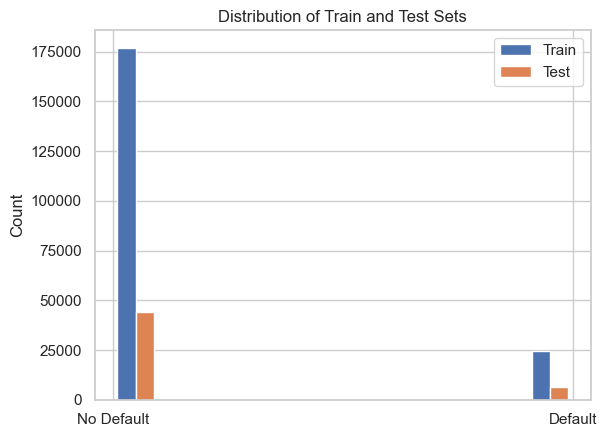

In [31]:
data_distribution(y_train, y_test)

In [32]:
model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train,y_train)

y_pred = model_1.predict(X_test)
print_evaluation(y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400

Confusion Matrix
[[41937  2210]
 [ 2905  3348]]

ROC AUC score: 0.7426814851162876


In [34]:
# Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)
X_test_us, y_test_us = rus.fit_resample(X_test, y_test)

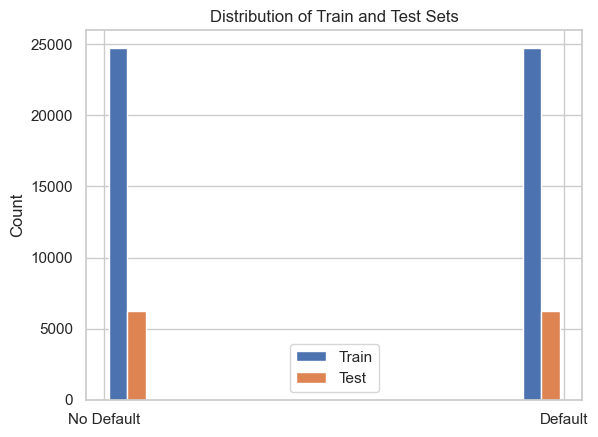

In [35]:
data_distribution(y_train_us, y_test_us)

In [36]:
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train_us,y_train_us)

y_pred_us = model_2.predict(X_test_us)
print_evaluation(y_test_us, y_pred_us)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6253
           1       0.88      0.81      0.84      6253

    accuracy                           0.85     12506
   macro avg       0.85      0.85      0.85     12506
weighted avg       0.85      0.85      0.85     12506

Confusion Matrix
[[5548  705]
 [1174 5079]]

ROC AUC score: 0.8497521189828883


In [37]:
# Oversampling
smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train)
X_test_os, y_test_os = smote.fit_resample(X_test, y_test)

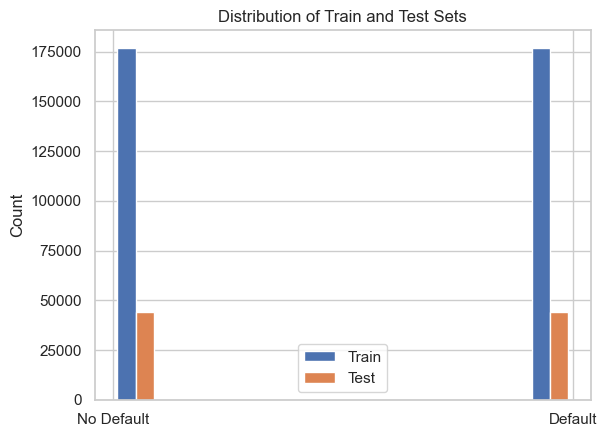

In [38]:
data_distribution(y_train_os, y_test_os)

In [39]:
model_3 = RandomForestClassifier(random_state=42)
model_3.fit(X_train_os,y_train_os)

y_pred_os = model_3.predict(X_test_os)
print_evaluation(y_test_os, y_pred_os)

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     44147
           1       0.90      0.93      0.92     44147

    accuracy                           0.92     88294
   macro avg       0.92      0.92      0.92     88294
weighted avg       0.92      0.92      0.92     88294

Confusion Matrix
[[39731  4416]
 [ 2898 41249]]

ROC AUC score: 0.9171631141413912


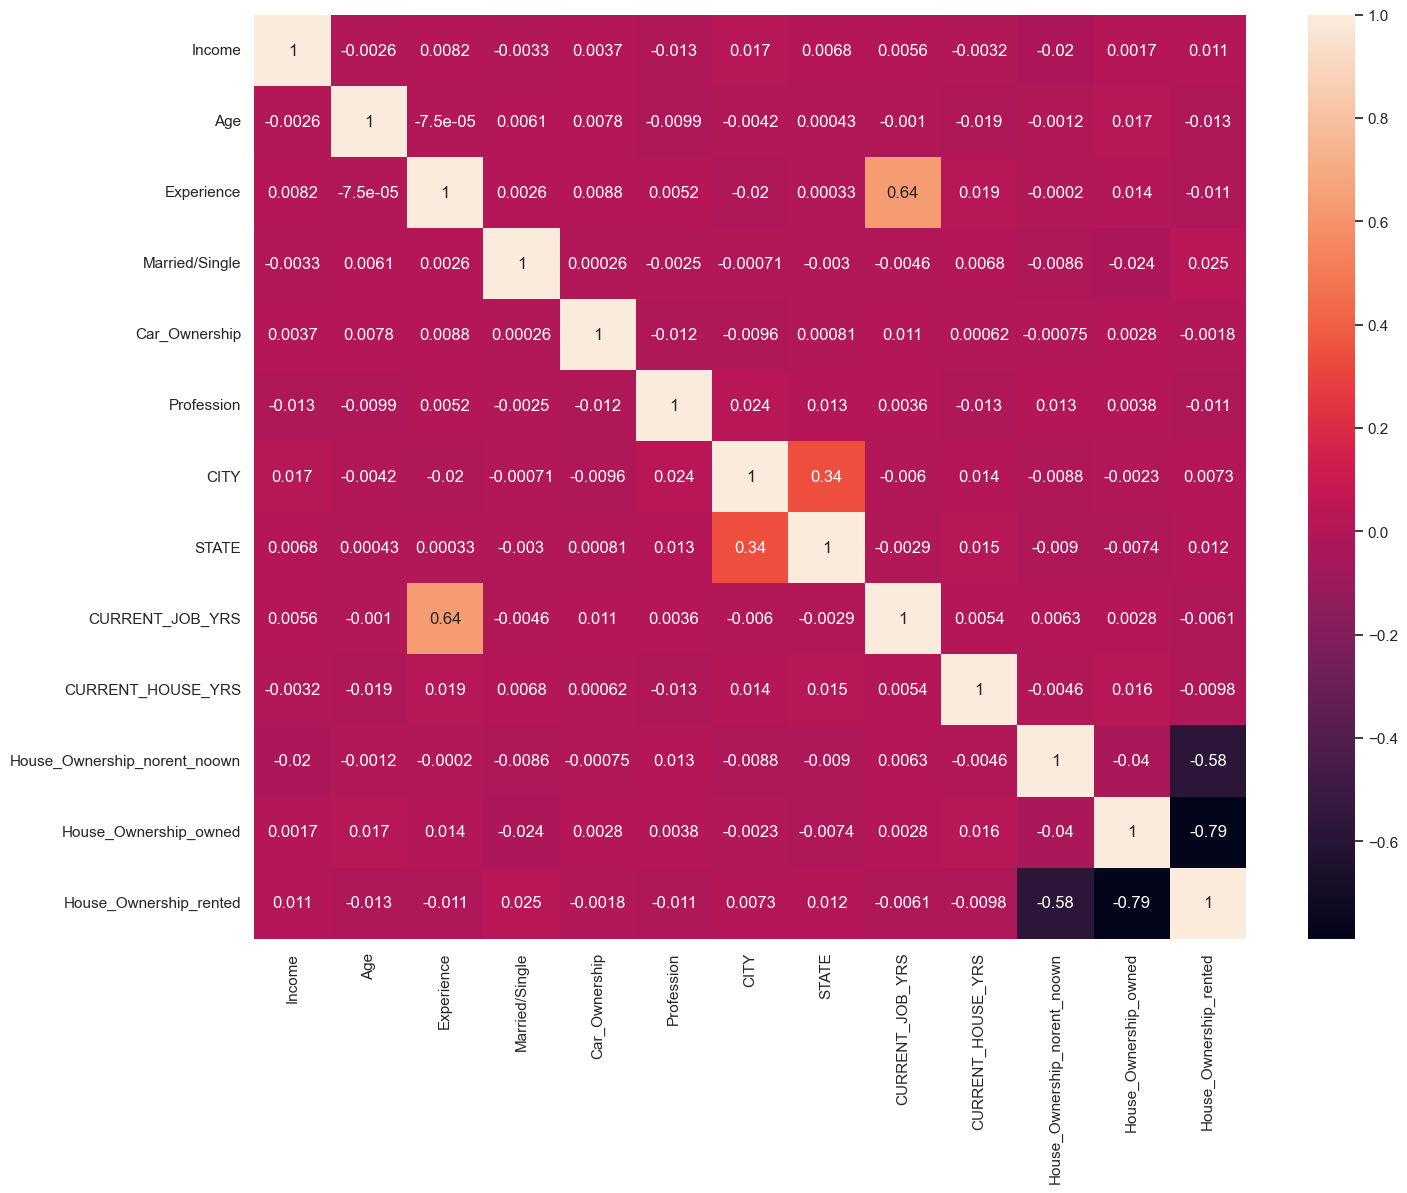

In [40]:
plt.figure(figsize=(16,12))
sns.heatmap(X_train.corr(method='spearman'), annot=True)
plt.show()

In [41]:
cols_to_drop = ['CURRENT_JOB_YRS', 'CITY']

X_train_reduced = X_train.drop(cols_to_drop, axis=1)
X_test_reduced = X_test.drop(cols_to_drop, axis=1)

smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train_reduced, y_train)
X_test_os, y_test_os = smote.fit_resample(X_test_reduced, y_test)

In [42]:
X_train_reduced.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,STATE,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
200471,1.430422,1.170436,1.318759,0,0,0.120873,0.139313,-0.712569,0.0,0.0,1.0
92611,-0.820701,-0.644922,-1.680840,0,0,0.128980,0.103837,-0.712569,0.0,0.0,1.0
86397,-1.385148,-0.644922,-0.181041,0,0,0.131487,0.128364,0.717243,0.0,0.0,1.0
110500,-0.383000,-1.699001,-1.347551,0,0,0.129292,0.133547,0.002337,0.0,0.0,1.0
185133,1.551521,-0.527803,-0.847618,0,1,0.107390,0.101142,0.717243,1.0,0.0,0.0


In [43]:
model_4 = RandomForestClassifier(random_state=42)
model_4.fit(X_train_os,y_train_os)

y_pred_os = model_4.predict(X_test_os)
print_evaluation(y_test_os, y_pred_os)

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     44147
           1       0.91      0.93      0.92     44147

    accuracy                           0.92     88294
   macro avg       0.92      0.92      0.92     88294
weighted avg       0.92      0.92      0.92     88294

Confusion Matrix
[[39957  4190]
 [ 3013 41134]]

ROC AUC score: 0.9184202777085645


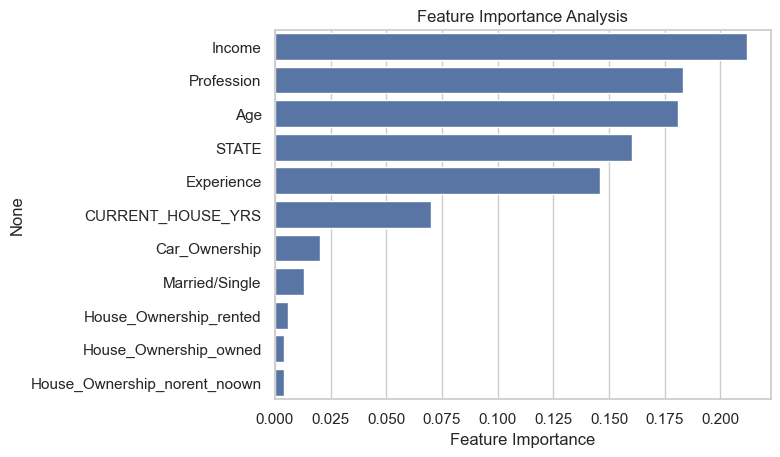

In [44]:
feature_imp = pd.DataFrame(index = X_train_reduced.columns, 
                           data = model_4.feature_importances_, 
                           columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)

ax = sns.barplot(x=feature_imp["Feature Importance"], y=feature_imp.index)
plt.title("Feature Importance Analysis")
plt.show()

In [45]:
cols_to_drop = cols_to_drop + ['Car_Ownership', 'Married/Single', 
                               'House_Ownership_rented', 'House_Ownership_owned', 
                               'House_Ownership_norent_noown']

X_train_reduced = X_train.drop(cols_to_drop, axis=1)
X_test_reduced = X_test.drop(cols_to_drop, axis=1)

smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train_reduced, y_train)
X_test_os, y_test_os = smote.fit_resample(X_test_reduced, y_test)

In [46]:
X_train_reduced.head()

,Income,Age,Experience,Profession,STATE,CURRENT_HOUSE_YRS
200471,1.430422,1.170436,1.318759,0.120873,0.139313,-0.712569
92611,-0.820701,-0.644922,-1.680840,0.128980,0.103837,-0.712569
86397,-1.385148,-0.644922,-0.181041,0.131487,0.128364,0.717243
110500,-0.383000,-1.699001,-1.347551,0.129292,0.133547,0.002337
185133,1.551521,-0.527803,-0.847618,0.107390,0.101142,0.717243


In [47]:
model_5 = RandomForestClassifier(random_state=42)
model_5.fit(X_train_os,y_train_os)

y_pred_os = model_5.predict(X_test_os)
print_evaluation(y_test_os, y_pred_os)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     44147
           1       0.91      0.94      0.92     44147

    accuracy                           0.92     88294
   macro avg       0.92      0.92      0.92     88294
weighted avg       0.92      0.92      0.92     88294

Confusion Matrix
[[39963  4184]
 [ 2704 41443]]

ROC AUC score: 0.9219879040478401


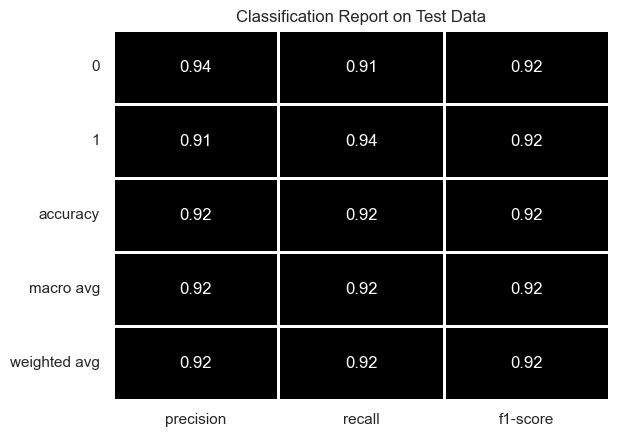

In [48]:
clf_report = classification_report(y_test_os, y_pred_os,
                                   labels=[0, 1],
                                   target_names=list("01"),
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cbar=False, 
            cmap=ListedColormap(['black']), linewidths=1, linecolor='white')
plt.title("Classification Report on Test Data")
plt.show()

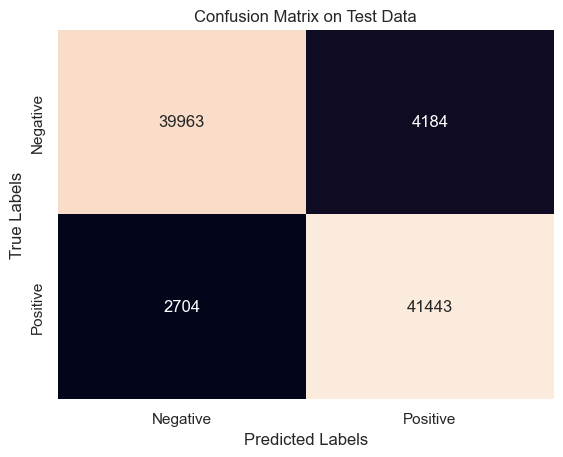

In [49]:
c_m = confusion_matrix(y_test_os, y_pred_os)
c_m_df = pd.DataFrame(c_m, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
sns.heatmap(c_m_df, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix on Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

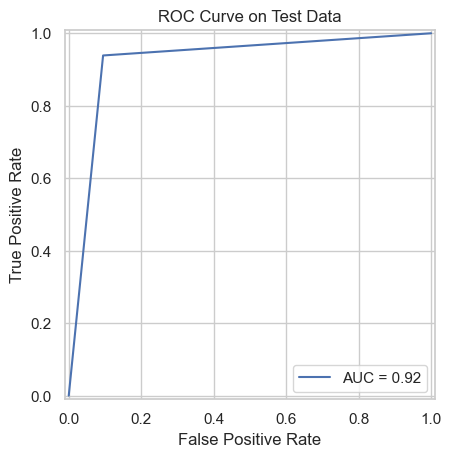

In [50]:
fpr, tpr, _ = roc_curve(y_test_os, y_pred_os)
score = roc_auc_score(y_test_os,y_pred_os)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=score)
display.plot()
plt.title("ROC Curve on Test Data")
plt.show() 